In [2]:
# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
# 📁 Step 2: Ensure output directory exists
os.makedirs("../output", exist_ok=True)


In [4]:
# 📊 Step 3: Load Dataset from parent directory's Data folder
df = pd.read_csv("../Data/Housing.csv")
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
# 🧼 Step 4: Preprocess the data
# Encode 'yes'/'no' columns to 1/0
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if x == 'yes' else 0)

# One-hot encode 'furnishingstatus'
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)


C:\Users\Acer\AppData\Local\Temp\ipykernel_13688\1171615565.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if x == 'yes' else 0)


In [6]:
# 🎯 Step 5: Split data into train-test sets
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# 🤖 Step 6: Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [8]:
# 📈 Step 7: Predict and evaluate
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Save metrics to file
with open("../output/evaluation_metrics.txt", "w") as f:
    f.write(f"MAE: {mae:.2f}\n")
    f.write(f"MSE: {mse:.2f}\n")
    f.write(f"R² Score: {r2:.4f}\n")


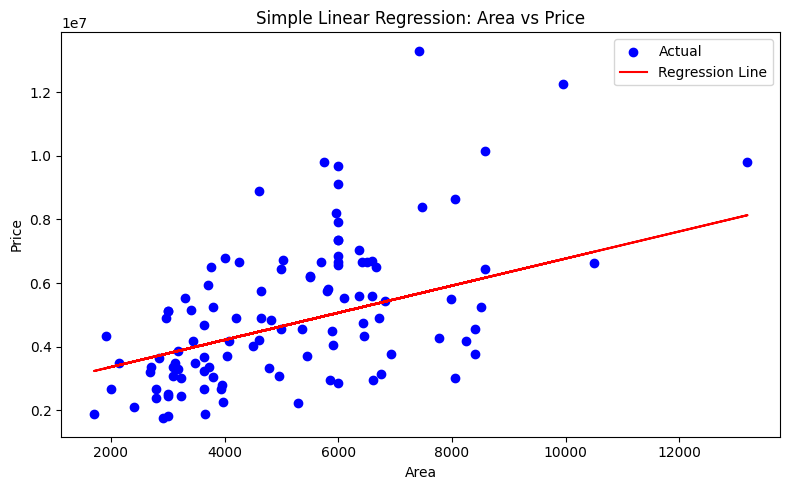

In [9]:
# 📉 Step 8: Plot simple regression (Area vs Price)
simple_model = LinearRegression()
simple_model.fit(X_train[['area']], y_train)

plt.figure(figsize=(8, 5))
plt.scatter(X_test['area'], y_test, color='blue', label='Actual')
plt.plot(X_test['area'], simple_model.predict(X_test[['area']]), color='red', label='Regression Line')
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Simple Linear Regression: Area vs Price")
plt.legend()
plt.tight_layout()
plt.savefig("../output/regression_plot.png")
plt.show()


In [10]:
# 🔍 Interpret model coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Save to output
coefficients.to_csv("../output/feature_coefficients.csv", index=False)

# Display top contributing features
coefficients


,Feature,Coefficient
2,bathrooms,1.094445e+06
8,airconditioning,7.914267e+05
7,hotwaterheating,6.846499e+05
10,prefarea,6.298906e+05
12,furnishingstatus_unfurnished,-4.136451e+05
3,stories,4.074766e+05
6,basement,3.902512e+05
4,mainroad,3.679199e+05
5,guestroom,2.316100e+05
9,parking,2.248419e+05
